# Notion de complexité 

##### Auteur: Ahmed A. REBAI
##### ESPRIT Engineering School

## Définition et exemple

La complexité d'un problème mathématique P est la quantité de ressources nécessaires à la résolution de P.

On s'intéresse alors à la complexité temporelle. Le temps est mesuré en informatique théorique par le nombre d'étapes de calcul (plus exactement le nombre d'étapes de calcul élémentaire donc ce sont ces étapes qui sont élémentaires).
On essaye de savoir combien il faut d'étapes élémentaires pour résourdre le problème.

Un problème peut être résolu avec plusieurs manières: Il existe donc plusieurs algorithmes qui permettent de résoudre ce problème. 

Imaginons qu'il existe n algorithmes A1, A2,..., An permettant de résoudre P. Ainsi C(P) = min(C(Ai))
Ce qui nous pousse à définir la complexité dans deux situations : 
- le plus pire des cas
- le meilleur des cas

Exemple:
Soit le problème suivant, chercher un élément dans une liste L. On retourne donc True si x appartient à L et et False sinon.

In [1]:
# Le premier algorithme permettant de chercher un élément dans une liste
# Implémentation de l'algorithme avec une fonction Python
def chercher1(x,L):
    i = 0            # complexité de 1
    # la fonction longueur (qui calcule la taille) n'est pas élémentaire:
    # complexité de n
    while(i<len(L)): 
        if(x==L[i]): # complexité de 1
            return True
        else:
            i = i+1 # complexité de 1
    return False

# Vérification de la fonction sur une liste et un élémént
L = [11,14,1,13,123]
print(chercher1(1,L))
print(chercher1(10,L))

True
False


On note $C_1$ la complexité de la fonction chercher1 
\begin{equation}
C_1(n) = 1 + (1 + 1 + n) * n = n^2 + 2n + 1 = O_{+\infty}(n^2) 
\end{equation}

C'est une complexité parabolique: il suffit de multiplier la taille de la liste par 10 pour multiplier le temps d'exécution par 100.

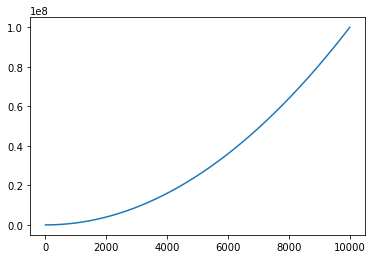

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

def f(x):
    return x*x

N = 10000
X = [i for i in range(N)]
Y = [None]*N
for i in range(N):
    Y[i] = f(X[i])
plt.plot(X,Y)

On remarque que l'évaluation de la longueur de la liste dans la condition de la boucle while implique l'existence de $n^2$. Une solution consiste à évaluer la longueur de L une seule fois. Ce qui donne donc le deuxième algorithme:

In [3]:
def chercher2(x,L):
    n = len(L)         # complexité de n 
    for i in range(n): # On répéte le calcul n fois (complexité = n)
        if x == L[i]:  # complexité de 1
            return True
    return False

# Vérification de la fonction chercher2 sur une liste et un élément
L = [11,14,1,13,123]
print(chercher2(1,L))
print(chercher2(10,L))

True
False


On note $C_2$ la complexité de la fonction chercher2 
\begin{equation}
C_2(n) = n + n = 2*n = O_{+\infty}(n) 
\end{equation}

C'est une complexité linéaire: il suffit de multiplier la taille de la liste par 10 pour multiplier le temps d'exécution par 10.

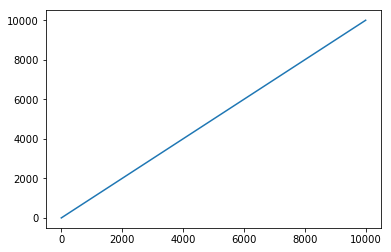

In [4]:
def f(x):
    return x

N = 10000
X = [i for i in range(N)]
Y = [None]*N
for i in range(N):
    Y[i] = f(X[i])
plt.plot(X,Y)

Passons maintenant à un troisième algorithme utilisant le paradigme "diviser pour régner" couplé à la récursivité!
On suppose que la liste est triée de manière croissante.

Pour traiter un problème de taile N, il est parfois efficace de :
- partager le problème en k sous-problèmes de taille $\lfloor N/2 \rfloor$ ou $\lceil N/2 \rceil$ ($k \in \mathbb{N^*}$)
- résoudre les k problèmes ainsi obtenus (souvent récursivement...)
- fusionner les résultats ainsi obtenus pour fournir la solution

In [5]:
def chercher3(x, L):
    if len(L)==1 :
        return False
    m = len(L)//2
    if L[m] == x :
        return True
    elif L[m] > x:
        return chercher3(x, L[:m])
    else:
        return chercher3(x, L[m:])

# Vérification de la fonction chercher2 sur une liste et un élément
L = [11,14,1,13,123]
print(chercher3(1,L))
print(chercher3(10,L))

True
False


Attention aux commandes Python du genre chercher3(x,L[:m]) qui semblent fournir une version récursive, mais contenant un coût caché linéaire (avec L[:m] Python doit recopier les valeurs de la sous liste considérée. Alors on ne peut pas annoncer une complexité logarithmique. 

In [6]:
def cherche3rec(x,t):
    #fonction auxiliaire récursive
    def Listedivisee(i,j):
        if i==j-1:
            return t[i]==x
        else:
            m=(i+j)//2
            if t[m]<=x:
                return Listedivisee(m,j)
            else:
                return Listedivisee(i,m)
            #fonction principale triviale
            #qui permet d'évoluer la fonction
            #récursive 
    return Listedivisee(0,len(t))

Cet algorithme utilise deux paradigmes:
- diviser pour régner 
- la récursivité

Donc la complexité $C_3(n)=O(log(n))$

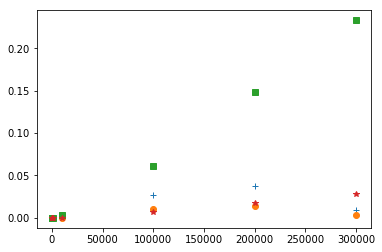

In [7]:
# Ce code permet de représenter les différents temps d'exécution 
#de 4 algorithmes présenté ci-dessous:
import matplotlib.pyplot as plt
import time
import random

T1=[]
T2=[]
T3=[]
T4=[]

N = [10,100,500,1000,10000,100000,200000,300000]
for n in N:
    L = [None]*n

    for i in range(n):
        L[i] = random.randint(1,n)


    x = L[random.randint(1,n)]

    start_time = time.time()
    chercher1(x,L)
    T1.append(time.time() - start_time)
    #print("--- %s secondes pour le 1er algorithme ---" % (time.time() - start_time))
    
    start_time = time.time()
    chercher2(x,L)
    T2.append(time.time() - start_time)
    #print("--- %s secondes pour le 2eme algorithme ---" % (time.time() - start_time))

    start_time = time.time()
    L.sort()
    chercher3(x,L)
    T3.append(time.time() - start_time)
    #print("--- %s secondes pour le 3eme algorithme ---" % (time.time() - start_time))

    start_time = time.time()
    L.sort()
    cherche3rec(x,L)
    T4.append(time.time() - start_time)
    #print("--- %s secondes pour le 4eme algorithme ---" % (time.time() - start_time))

plt.plot(N,T1,'+',N,T2,'o',N,T3,'s',N,T4,'*')

#### La figure précédente montre des résultats contre-intuitifs à nos de la complexité. En effet, nous avons représenté le temps d'exécution de chaque algorithme en fonction de la taille de la liste. 

In [8]:
# Quelques implémentations de l'algorithme de recherche d'un élément 
# dans une liste

# Version récursive
def Cherche3rec(x,t):
    #fonction auxiliaire récursive
    def Listedivisee(i,j):
        if i==j-1:
            return t[i]==x
        else:
            m=(i+j)//2
            if t[m]<=x:
                return Listedivisee(m,j)
            else:
                return Listedivisee(i,m)
            #fonction principale triviale
            #qui permet d'évoluer la fonction
            #récursive 
    return Listedivisee(0,len(t))

# Version itérative
def chercher3iter(x,t):
    i=0
    j=len(t)
    while i<j-1:
        m=(i+j)//2
        if t[m]<=x:
            i=m
        else:
            j=m
    return t[i]==x